# 1. THU THẬP DỮ LIỆU
Dữ liệu được lấy từ dataset của trang web Imdb. Sau khi tổng hợp dữ liệu từ 2 dataset thông tin phim và đánh giá phim ta thu được thông tin phim

In [1]:
import requests, gzip
import pandas as pd
import os

# URLs IMDb datasets
URL_RATINGS = "https://datasets.imdbws.com/title.ratings.tsv.gz"
URL_BASICS  = "https://datasets.imdbws.com/title.basics.tsv.gz"

# Hàm tải file nếu chưa có
def download_if_missing(url, filename):
    if os.path.exists(filename):
        print(f"[skip] {filename} đã tồn tại.")
        return
    print(f"[download] {url}")
    with requests.get(url, stream=True) as r:
        r.raise_for_status()
        with open(filename, "wb") as f:
            for chunk in r.iter_content(1024*1024):
                if chunk:
                    f.write(chunk)
    print(f"[done] {filename}")

# Tải dữ liệu
download_if_missing(URL_RATINGS, "title.ratings.tsv.gz")
download_if_missing(URL_BASICS,  "title.basics.tsv.gz")

# Đọc dữ liệu
with gzip.open("title.ratings.tsv.gz", "rt", encoding="utf-8") as f:
    ratings = pd.read_csv(f, sep="\t")

with gzip.open("title.basics.tsv.gz", "rt", encoding="utf-8") as f:
    basics = pd.read_csv(f, sep="\t")

# Ghép dữ liệu theo tconst
movies = pd.merge(ratings, basics, on="tconst")

# Lọc phim điện ảnh
movies = movies[movies["titleType"] == "movie"]

# Chọn cột quan trọng
movies = movies[[
    "tconst", "primaryTitle", "originalTitle",
    "startYear", "runtimeMinutes", "genres",
    "averageRating", "numVotes"
]]

# Lấy 1500 phim ngẫu nhiên
sample_movies = movies.sample(n=1500, random_state=42)

# Xuất CSV
sample_movies.to_csv("movies.csv", index=False, encoding="utf-8")

print("✅ Đã lưu file movies.csv ")


[download] https://datasets.imdbws.com/title.ratings.tsv.gz
[done] title.ratings.tsv.gz
[download] https://datasets.imdbws.com/title.basics.tsv.gz
[done] title.basics.tsv.gz
✅ Đã lưu file movies.csv 


# 2. LÀM SẠCH DỮ LIỆU


## 2.1 KHAI BÁO THƯ VIỆN VÀ ĐỌC THÔNG TIN DATASET

Khai báo thư viện và đọc thông tin và liệt kê 5 dòng đầu của tập dữ liệu

In [8]:
#  Import thư viện
import pandas as pd
import numpy as np

# Đường dẫn file CSV
FILE_PATH = "movies.csv"
df = pd.read_csv(FILE_PATH)

# Thông tin cơ bản
print("=== Thông tin DataFrame  ===")
df.info()
print("\nSố hàng:", len(df))
print("Tên cột:", list(df.columns))

# Liệt kê 10 dòng đầu của tập dữ liệu
df.head(10)



=== Thông tin DataFrame  ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tconst          1500 non-null   object 
 1   primaryTitle    1500 non-null   object 
 2   originalTitle   1500 non-null   object 
 3   startYear       1500 non-null   int64  
 4   runtimeMinutes  1500 non-null   object 
 5   genres          1500 non-null   object 
 6   averageRating   1500 non-null   float64
 7   numVotes        1500 non-null   int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 93.9+ KB

Số hàng: 1500
Tên cột: ['tconst', 'primaryTitle', 'originalTitle', 'startYear', 'runtimeMinutes', 'genres', 'averageRating', 'numVotes']


,tconst,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes
0,tt5655954,Vetrivel,Vetrivel,2016,141,Drama,6.3,427
1,tt0062046,"Make Love, Not War","Non faccio la guerra, faccio l'amore",1966,87,Comedy,5.2,30
2,tt3414164,"Dead Teobaldo, Exiled Romeo","Teobaldo Morto, Romeu Exilado",2015,118,Drama,6.0,22
3,tt7389864,Greetings from Krampus,Greetings from Krampus,2018,95,Documentary,8.4,16
4,tt2925388,Lazar,Lazar,2015,98,"Crime,Drama,Thriller",5.8,200
5,tt0103977,Claire of the Moon,Claire of the Moon,1992,107,"Drama,Romance",5.1,1138
6,tt13404996,Steel-Man,Steel-Man,2022,133,"Action,Comedy,Horror",6.2,14
7,tt1079968,Jack and the Beanstalk,Jack and the Beanstalk,2009,94,"Adventure,Comedy,Family",4.6,2238
8,tt18765420,Curse of the Re-Animator,Curse of the Re-Animator,2022,49,"Horror,Sci-Fi",5.3,100
9,tt0022971,The Half-Naked Truth,The Half Naked Truth,1932,77,"Comedy,Romance",6.1,728


## 2.2 Kiểm tra dữ liệu thiếu

In [3]:
# Kiểm tra giá trị thiếu
print("=== Số giá trị NaN theo cột ===")
print(df.isna().sum())

print("\n=== Số giá trị '\\N' theo cột ===")
print((df == "\\N").sum())


=== Số giá trị NaN theo cột ===
tconst            0
primaryTitle      0
originalTitle     0
startYear         0
runtimeMinutes    0
genres            0
averageRating     0
numVotes          0
dtype: int64

=== Số giá trị '\N' theo cột ===
tconst              0
primaryTitle        0
originalTitle       0
startYear           0
runtimeMinutes    152
genres             38
averageRating       0
numVotes            0
dtype: int64


## 2.3 XỬ LÝ LÀM SẠCH DỮ LIỆU


In [32]:
# Sao chép dataframe gốc
df_clean = df.copy()

# 1. Xử lý runtimeMinutes: loại bỏ phim thiếu
df_clean = df_clean[df_clean['runtimeMinutes'] != "\\N"]
df_clean['runtimeMinutes'] = pd.to_numeric(df_clean['runtimeMinutes'])

# 2. Loại bỏ nếu thiếu rating hoặc numVotes (hiện tại không có NaN ở đây, nhưng vẫn chắc chắn)
df_clean = df_clean.dropna(subset=['averageRating', 'numVotes'])

# 3. Genres thiếu → gán nhãn "Others"
df_clean['genres'] = df_clean['genres'].replace("\\N", "Others")

# Thông tin sau khi làm sạch
clean_info = {
    "Số phim ban đầu": len(df),
    "Số phim sau khi làm sạch": len(df_clean),
    "Còn thiếu runtimeMinutes": df_clean['runtimeMinutes'].isna().sum(),
    "Còn thiếu genres": (df_clean['genres'] == "Others").sum()
}

print("=== Thông tin sau khi làm sạch ===")
for key, value in clean_info.items():
    print(f"{key}: {value}")

# Lưu dữ liệu đã làm sạch vào file CSV mới
clean_file_path = "movies_cleaned.csv"
df_clean.to_csv(clean_file_path, index=False, encoding="utf-8")
print(f"\n✅ Đã lưu dữ liệu đã làm sạch vào file: {clean_file_path}")

clean_info


=== Thông tin sau khi làm sạch ===
Số phim ban đầu: 1348
Số phim sau khi làm sạch: 1348
Còn thiếu runtimeMinutes: 0
Còn thiếu genres: 18

✅ Đã lưu dữ liệu đã làm sạch vào file: movies_cleaned.csv


{'Số phim ban đầu': 1348,
 'Số phim sau khi làm sạch': 1348,
 'Còn thiếu runtimeMinutes': np.int64(0),
 'Còn thiếu genres': np.int64(18)}

## 2.4. Trực quan dữ liệu sau khi được làm sạch

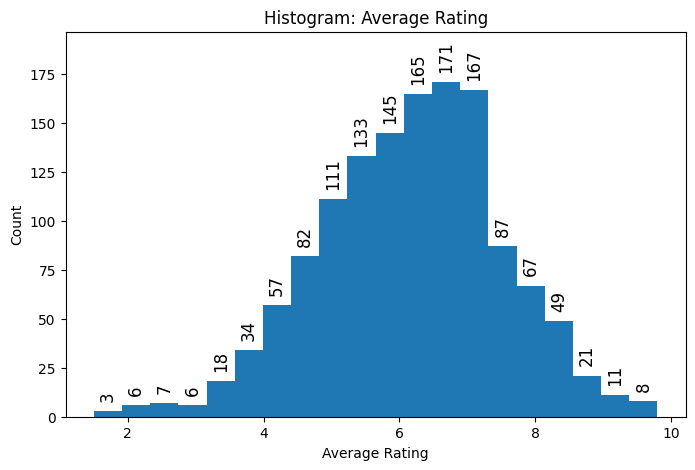

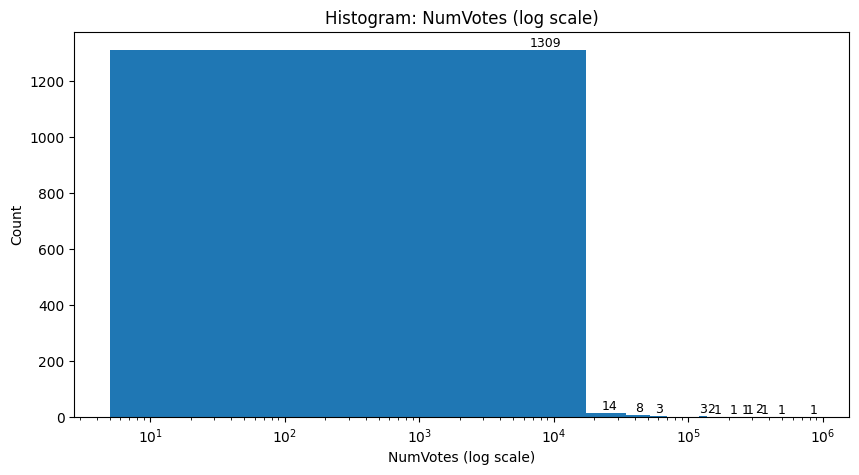

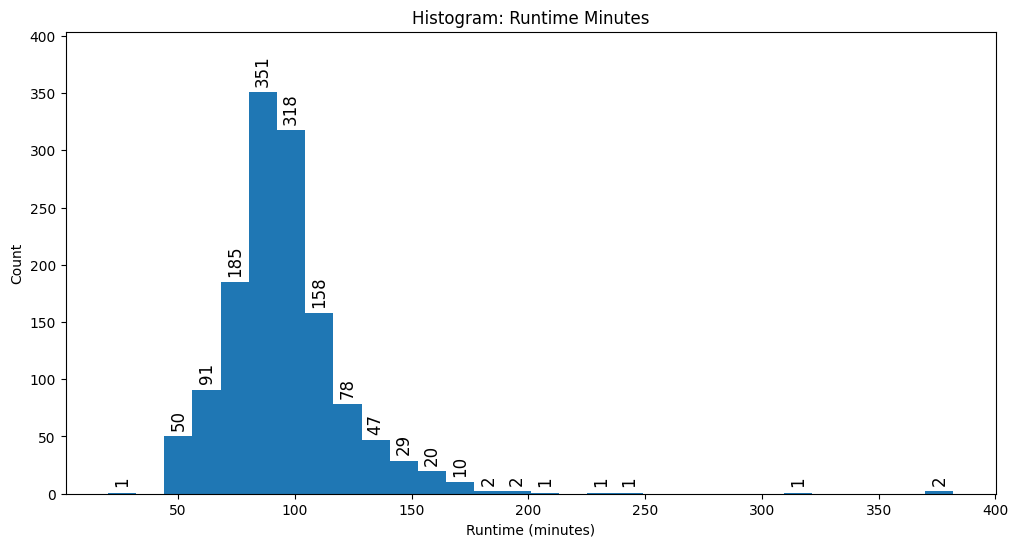

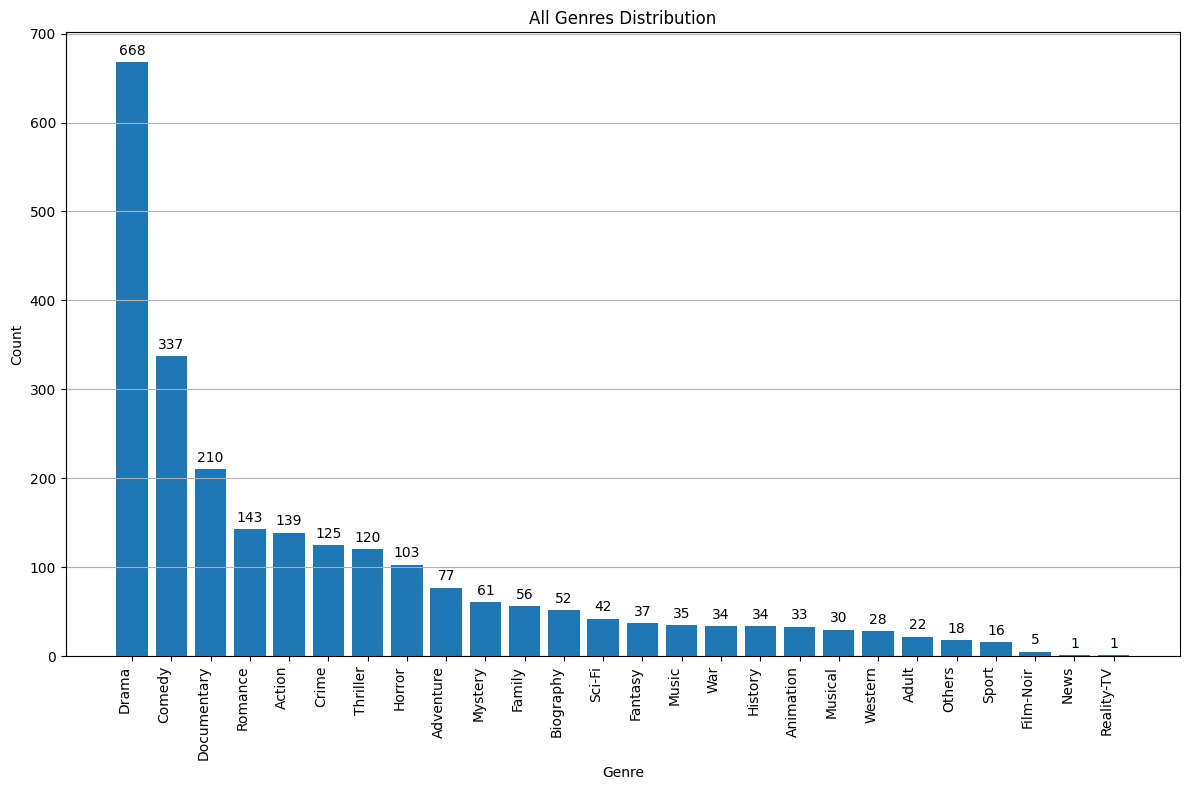

=== All Genres Table ===
          genre  count
0         Drama    668
1        Comedy    337
2   Documentary    210
3       Romance    143
4        Action    139
5         Crime    125
6      Thriller    120
7        Horror    103
8     Adventure     77
9       Mystery     61
10       Family     56
11    Biography     52
12       Sci-Fi     42
13      Fantasy     37
14        Music     35
15          War     34
16      History     34
17    Animation     33
18      Musical     30
19      Western     28
20        Adult     22
21       Others     18
22        Sport     16
23    Film-Noir      5
24         News      1
25   Reality-TV      1


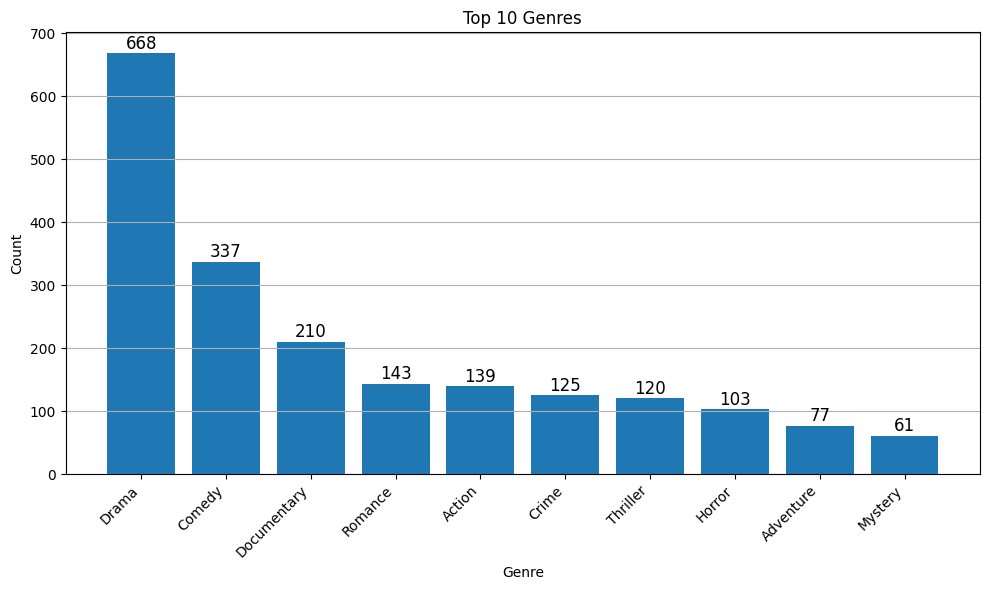

=== Top Genres Table ===
         genre  count
0        Drama    668
1       Comedy    337
2  Documentary    210
3      Romance    143
4       Action    139
5        Crime    125
6     Thriller    120
7       Horror    103
8    Adventure     77
9      Mystery     61


In [39]:
# Visualize cleaned IMDb 1500-sample dataset (after previous cleaning steps).
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

file_path_cleaned = "movies_cleaned.csv"
df = pd.read_csv(file_path_cleaned)

# Clean as before
df = df[df['runtimeMinutes'] != "\\N"].copy()
df['runtimeMinutes'] = pd.to_numeric(df['runtimeMinutes'])
df['genres'] = df['genres'].replace("\\N", "Others")

# Prepare genres counts (explode multi-genre strings)
genres_series = df['genres'].str.split(',').explode().str.strip()
genre_counts = genres_series.value_counts()

# Plot 1: Average Rating histogram
plt.figure(figsize=(8,5))
n, bins, patches = plt.hist(df['averageRating'].dropna(), bins=20)
plt.title("Histogram: Average Rating")
plt.xlabel("Average Rating")
plt.ylabel("Count")

max_rating_count = max(n)
plt.ylim(0, max_rating_count * 1.15)

for i in range(len(patches)):
    if n[i] > 0:  # Chỉ hiển thị nếu có dữ liệu
        plt.text(patches[i].get_x() + patches[i].get_width()/2, n[i] + 5,
                f'{int(n[i])}', ha='center', va='bottom', fontsize=12, rotation=90)
plt.show()

# Plot 2: NumVotes histogram (log scale on x-axis)
plt.figure(figsize=(10,5))
n, bins, patches = plt.hist(df['numVotes'].dropna(), bins=50)
plt.xscale('log')
plt.title("Histogram: NumVotes (log scale)")
plt.xlabel("NumVotes (log scale)")
plt.ylabel("Count")
# plt.grid(True, which="both", ls="--")
for i in range(len(patches)):
    if n[i] > 0:  # Chỉ hiển thị nếu có dữ liệu
        plt.text(patches[i].get_x() + patches[i].get_width()/2, n[i] + 1,
                f'{int(n[i])}', ha='center', va='bottom', fontsize=9)
plt.show()

# Plot 3: Runtime Minutes histogram
plt.figure(figsize=(12,6))
n, bins, patches = plt.hist(df['runtimeMinutes'].dropna(), bins=30)
plt.title("Histogram: Runtime Minutes")
plt.xlabel("Runtime (minutes)")
plt.ylabel("Count")

max_runtime_count = max(n)
plt.ylim(0, max_runtime_count * 1.15)

for i in range(len(patches)):
    if n[i] > 0:  # Chỉ hiển thị nếu có dữ liệu
        plt.text(patches[i].get_x() + patches[i].get_width()/2, n[i] + 5,
                f'{int(n[i])}', ha='center', va='bottom', fontsize=12, rotation=90)
plt.show()

# Plot 4: All genres bar chart
plt.figure(figsize=(12,8))
all_genres = genre_counts
bars = plt.bar(range(len(all_genres)), all_genres.values)
plt.title("All Genres Distribution")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(range(len(all_genres)), all_genres.index, rotation=90, ha='right')
plt.grid(axis='y')

# Thêm số lượng trên mỗi cột
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 5,
             f'{int(height)}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# Hiển thị bảng tất cả genres
all_genres_df = all_genres.reset_index()
all_genres_df.columns = ['genre', 'count']

print("=== All Genres Table ===")
print(all_genres_df)

# Plot 5: Top 10 genres bar chart
top_n = 10
top_genres = genre_counts.head(top_n)
plt.figure(figsize=(10,6))
bars = plt.bar(top_genres.index, top_genres.values)
plt.title(f"Top {top_n} Genres")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1,
             f'{int(height)}', ha='center', va='bottom', fontsize=12)
plt.tight_layout()
plt.show()

# Also show the top genres as a table for quick inspection
# Chuyển top_genres Series thành DataFrame để dễ vẽ và hiển thị
top_genres_df = top_genres.reset_index()
top_genres_df.columns = ['genre', 'count']

# Hiển thị bảng
print("=== Top Genres Table ===")
print(top_genres_df)
